In [1]:
import numpy as np
import cv2
import time
import matplotlib.pyplot as plt

In [2]:
class Sketcher:
    """OpenCV Utility class for mouse handling."""

    def __init__(self, windowname, dests, colors_func):
        self.prev_pt = None
        self.windowname = windowname
        self.dests = dests
        self.colors_func = colors_func
        self.dirty = False
        self.show()
        cv2.setMouseCallback(self.windowname, self.on_mouse)

    def show(self):
        cv2.imshow(self.windowname, self.dests[0])
        cv2.imshow(self.windowname + ": mask", self.dests[1])

    def on_mouse(self, event, x, y, flags, param):
        """Hanles mouse movement and events."""
        pt = (x, y)
        if event == cv2.EVENT_LBUTTONDOWN:
            self.prev_pt = pt
        elif event == cv2.EVENT_LBUTTONUP:
            self.prev_pt = None

        if self.prev_pt and flags & cv2.EVENT_FLAG_LBUTTON:
            for dst, color in zip(self.dests, self.colors_func()):
                cv2.line(dst, self.prev_pt, pt, color, 5)
            self.dirty = True
            self.prev_pt = pt
            self.show()

In [3]:
# Read image in color mode.
filename = "images/Car.jpg"
img = cv2.imread(filename, cv2.IMREAD_COLOR)

# If image is not read properly, return error.
if img is None:
    print('Failed to load image file: {}'.format(filename))

In [4]:
# Create a copy of original image.
img_mask = img.copy()
# Create a black copy of original image, acts as a mask.
inpaintMask = np.zeros(img.shape[:2], np.uint8)
# Create sketch using OpenCV Utility Class: Sketcher.
sketch = Sketcher('image', [img_mask, inpaintMask], lambda : ((0, 255, 0), 255))

In [5]:
while True:
    ch = cv2.waitKey()
    if ch == 27:
        break
    if ch == ord('t'):
        # Use Algorithm proposed by Alexendra Telea: Fast Marching Method (2004).
        t1t = time.time()
        res = cv2.inpaint(src=img_mask, inpaintMask=inpaintMask, inpaintRadius=3, flags=cv2.INPAINT_TELEA)
        t2t = time.time()
        ttime = t2t-t1t
        cv2.imshow('Inpaint Output using FMM', res)
    if ch == ord('n'):
        # Navier-Stokes, Fluid Dynamics, and Image and Video Inpainting (2001).
        t1n = time.time()
        res = cv2.inpaint(src = img_mask, inpaintMask = inpaintMask, inpaintRadius=3, flags=cv2.INPAINT_NS)
        t2n = time.time()
        ntime = t2n-t1n
        cv2.imshow('Inpaint Output using NS Technique', res)
    if ch == ord('r'):
        img_mask[:] = img
        inpaintMask[:] = 0
        sketch.show()

In [6]:
cv2.destroyAllWindows()

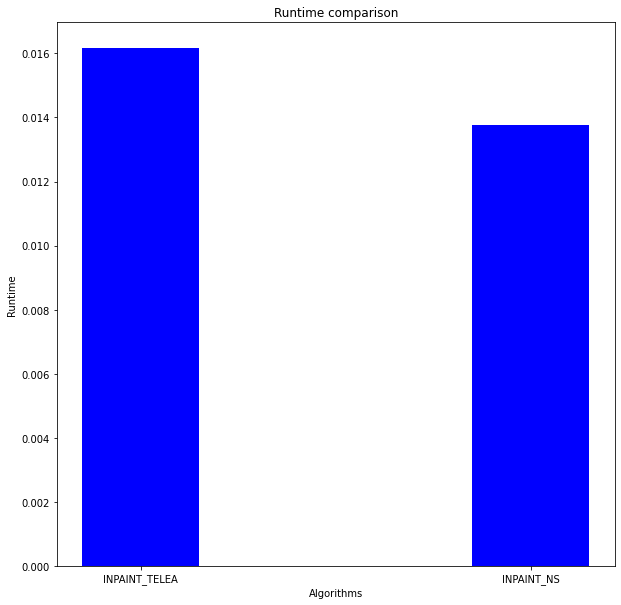

In [7]:
times = [ttime, ntime]
methods = ['INPAINT_TELEA', 'INPAINT_NS']

# Plot size
fig = plt.figure(figsize = (10, 10))
 
# Creating the stacked bar plot
plt.bar(methods, times, color ='blue', width = 0.3)
 
plt.xlabel('Algorithms')
plt.ylabel('Runtime')
plt.title('Runtime comparison')
plt.show()

# 4. Inpainting Results</font>
Let’s look at the result of applying inpainting to some old images that have given the test of time.

| ![c0-m10-inpaint-output1.jpg](https://opencv.org/wp-content/uploads/2021/09/c0-m10-inPaint-output1.jpg) |
| --- |
| <center>Inpainting Results : The first image (top-left) is the input image, the second image (top-right) is the mask, the third image (bottom-left) is the result of INPAINT_TELEA and the last image (bottom-right) is by INPAINT_NS.</center> |

<br><br>

| ![c0-m10-inpaint-output2.jpg](https://opencv.org/wp-content/uploads/2021/09/c0-m10-inPaint-output2.jpg) |
| --- |
| <center>Inpainting Results : The first image (top-left) is the input image, the second image (top-right) is the mask, the third image (bottom-left) is the result of INPAINT_TELEA and the last image (bottom-right) is by INPAINT_NS.</center> |